<a href="https://colab.research.google.com/github/salorema/Introducci-n-a-python/blob/main/Reto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reto final**

In [1]:
!pip install yfinance pandas matplotlib

In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [3]:
tickers = ['COP=X', 'BTC-USD', 'AAPL', '^GSPC', 'GC=F', 'GOOG']

In [4]:
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

print(f"Descargando datos desde: {start_date} hasta: {end_date}")

Descargando datos desde: 2024-12-03 hasta: 2025-12-03


In [5]:
data = yf.download(
    tickers,
    start=start_date,
    end=end_date,
    interval='1d',
    group_by='ticker' # Agrupa los datos por cada ticker
)

/tmp/ipython-input-3175924283.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  6 of 6 completed


In [6]:
df = data.loc[:, (tickers, ['Close', 'Volume'])]

print("\nPrimeras filas del DataFrame con Close y Volume:")
print(df.head())
print("\nInformación del DataFrame:")
print(df.info())


Primeras filas del DataFrame con Close y Volume:
Ticker            COP=X              BTC-USD                      AAPL  \
Price             Close Volume         Close        Volume       Close   
Date                                                                     
2024-12-03  4457.750000    0.0  96002.164062   67067810961  241.557495   
2024-12-04  4435.500000    0.0  98768.531250   77199817112  241.915878   
2024-12-05  4425.750000    0.0  96593.570312  149218945580  241.945724   
2024-12-06  4413.669922    0.0  99920.710938   94534772658  241.746628   
2024-12-07          NaN    NaN  99923.335938   44177510897         NaN   

Ticker                        ^GSPC                       GC=F          \
Price           Volume        Close        Volume        Close  Volume   
Date                                                                     
2024-12-03  38861000.0  6049.879883  4.095000e+09  2644.699951  1062.0   
2024-12-04  44383900.0  6086.490234  4.003390e+09  2653.80004

In [7]:
print("\nCantidad de NaN antes de la limpieza:")
print(df.isnull().sum())


Cantidad de NaN antes de la limpieza:
Ticker   Price 
COP=X    Close     107
         Volume    107
BTC-USD  Close       0
         Volume      0
AAPL     Close     115
         Volume    115
^GSPC    Close     115
         Volume    115
GC=F     Close     118
         Volume    118
GOOG     Close     115
         Volume    115
dtype: int64


In [8]:
df_cleaned = df.fillna(method='ffill')

/tmp/ipython-input-2469613599.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df.fillna(method='ffill')


In [9]:
print("\nCantidad de NaN después de la limpieza:")
print(df_cleaned.isnull().sum())


Cantidad de NaN después de la limpieza:
Ticker   Price 
COP=X    Close     0
         Volume    0
BTC-USD  Close     0
         Volume    0
AAPL     Close     0
         Volume    0
^GSPC    Close     0
         Volume    0
GC=F     Close     0
         Volume    0
GOOG     Close     0
         Volume    0
dtype: int64


In [10]:
print("\nPrimeras filas del DataFrame Limpio:")
print(df_cleaned.head())


Primeras filas del DataFrame Limpio:
Ticker            COP=X              BTC-USD                      AAPL  \
Price             Close Volume         Close        Volume       Close   
Date                                                                     
2024-12-03  4457.750000    0.0  96002.164062   67067810961  241.557495   
2024-12-04  4435.500000    0.0  98768.531250   77199817112  241.915878   
2024-12-05  4425.750000    0.0  96593.570312  149218945580  241.945724   
2024-12-06  4413.669922    0.0  99920.710938   94534772658  241.746628   
2024-12-07  4413.669922    0.0  99923.335938   44177510897  241.746628   

Ticker                        ^GSPC                       GC=F          \
Price           Volume        Close        Volume        Close  Volume   
Date                                                                     
2024-12-03  38861000.0  6049.879883  4.095000e+09  2644.699951  1062.0   
2024-12-04  44383900.0  6086.490234  4.003390e+09  2653.800049   249.0   

In [11]:
import pandas as pd


In [12]:
activo_nombre = 'BTC-USD'
columna_volumen = (activo_nombre, 'Volume')
nueva_columna = f'catvolume#{activo_nombre}'

In [13]:
etiquetas_cuartiles = ['Bajo', 'Medio', 'Alto', 'Muy alto']
df_cleaned[nueva_columna] = pd.qcut(df_cleaned[columna_volumen], q=4, labels=etiquetas_cuartiles)

In [14]:
print(f"✅ Variable '{nueva_columna}' creada exitosamente.")

✅ Variable 'catvolume#BTC-USD' creada exitosamente.


In [15]:
print("\nPrimeras filas del DataFrame con la nueva columna:")
print(df_cleaned.head())


Primeras filas del DataFrame con la nueva columna:
Ticker            COP=X              BTC-USD                      AAPL  \
Price             Close Volume         Close        Volume       Close   
Date                                                                     
2024-12-03  4457.750000    0.0  96002.164062   67067810961  241.557495   
2024-12-04  4435.500000    0.0  98768.531250   77199817112  241.915878   
2024-12-05  4425.750000    0.0  96593.570312  149218945580  241.945724   
2024-12-06  4413.669922    0.0  99920.710938   94534772658  241.746628   
2024-12-07  4413.669922    0.0  99923.335938   44177510897  241.746628   

Ticker                        ^GSPC                       GC=F          \
Price           Volume        Close        Volume        Close  Volume   
Date                                                                     
2024-12-03  38861000.0  6049.879883  4.095000e+09  2644.699951  1062.0   
2024-12-04  44383900.0  6086.490234  4.003390e+09  2653.800

In [16]:
print("\nFrecuencia de cada categoría:")
print(df_cleaned[nueva_columna].value_counts())


Frecuencia de cada categoría:
catvolume#BTC-USD
Bajo        92
Medio       91
Alto        91
Muy alto    91
Name: count, dtype: int64


In [17]:
print("Estado del DataFrame antes de resetear el índice:")
print(df_cleaned.head())
print("-" * 50)

Estado del DataFrame antes de resetear el índice:
Ticker            COP=X              BTC-USD                      AAPL  \
Price             Close Volume         Close        Volume       Close   
Date                                                                     
2024-12-03  4457.750000    0.0  96002.164062   67067810961  241.557495   
2024-12-04  4435.500000    0.0  98768.531250   77199817112  241.915878   
2024-12-05  4425.750000    0.0  96593.570312  149218945580  241.945724   
2024-12-06  4413.669922    0.0  99920.710938   94534772658  241.746628   
2024-12-07  4413.669922    0.0  99923.335938   44177510897  241.746628   

Ticker                        ^GSPC                       GC=F          \
Price           Volume        Close        Volume        Close  Volume   
Date                                                                     
2024-12-03  38861000.0  6049.879883  4.095000e+09  2644.699951  1062.0   
2024-12-04  44383900.0  6086.490234  4.003390e+09  2653.80004

In [18]:
df_final = df_cleaned.reset_index()

In [20]:
try:
    df_final = df_final.rename(columns={'Date': 'index'})
except KeyError:
  pass

In [21]:
print("✅ Columna 'index' creada y colocada en la primera posición.")
print("\nVerificación de la nueva estructura del DataFrame:")
print(df_final.head())

✅ Columna 'index' creada y colocada en la primera posición.

Verificación de la nueva estructura del DataFrame:
Ticker      index        COP=X              BTC-USD                      AAPL  \
Price                    Close Volume         Close        Volume       Close   
0      2024-12-03  4457.750000    0.0  96002.164062   67067810961  241.557495   
1      2024-12-04  4435.500000    0.0  98768.531250   77199817112  241.915878   
2      2024-12-05  4425.750000    0.0  96593.570312  149218945580  241.945724   
3      2024-12-06  4413.669922    0.0  99920.710938   94534772658  241.746628   
4      2024-12-07  4413.669922    0.0  99923.335938   44177510897  241.746628   

Ticker                    ^GSPC                       GC=F          \
Price       Volume        Close        Volume        Close  Volume   
0       38861000.0  6049.879883  4.095000e+09  2644.699951  1062.0   
1       44383900.0  6086.490234  4.003390e+09  2653.800049   249.0   
2       40033900.0  6075.109863  4.21202

In [22]:
print("\nNombres de las primeras columnas:")
print(df_final.columns.tolist()[:3])


Nombres de las primeras columnas:
[('index', ''), ('COP=X', 'Close'), ('COP=X', 'Volume')]


In [23]:
import pandas as pd

In [24]:
col_btc_usd = ('BTC-USD', 'Close')
col_usd_cop = ('COP=X', 'Close')

In [25]:
nombre_nueva_col = 'BTC_in_COP'

In [32]:
df_final[nombre_nueva_col] = df_final[col_btc_usd] * df_final[col_usd_cop]

In [33]:
cols = df_final.columns.tolist()

In [36]:
cols.remove(nombre_nueva_col)

In [34]:
try:
    btc_volume_idx = cols.index(('BTC-USD', 'Volume'))
    cols.insert(btc_volume_idx + 1, nombre_nueva_col)
except ValueError:
    # Caso de que la columna de volumen no esté (aunque debería)
    cols.insert(cols.index(col_btc_usd) + 1, nombre_nueva_col)

In [37]:
df_final = df_final[cols]

In [38]:
print(f"✅ Columna '{nombre_nueva_col}' creada y calculada exitosamente.")

✅ Columna 'BTC_in_COP' creada y calculada exitosamente.


In [40]:
print("\nVerificación de los primeros valores (multiplicación BTC(USD) * COP=X):")
print(df_final[[('index', ''), col_usd_cop, col_btc_usd, ('BTC_in_COP', '')]].head())


Verificación de los primeros valores (multiplicación BTC(USD) * COP=X):
Ticker      index        COP=X       BTC-USD    BTC_in_COP
Price                    Close         Close              
0      2024-12-03  4457.750000  96002.164062  4.279536e+08
1      2024-12-04  4435.500000  98768.531250  4.380878e+08
2      2024-12-05  4425.750000  96593.570312  4.274990e+08
3      2024-12-06  4413.669922  99920.710938  4.410170e+08
4      2024-12-07  4413.669922  99923.335938  4.410286e+08


In [42]:
cols_to_describe = [col for col in df_final.columns if isinstance(col, tuple)]
cols_to_describe.append((nombre_nueva_col, ''))

df_summary = df_final[cols_to_describe].describe().T

print("✅ Resumen Estadístico Descriptivo de Variables Numéricas:")
print(df_summary)

✅ Resumen Estadístico Descriptivo de Variables Numéricas:
                   count                 mean                  min  \
Ticker     Price                                                     
index                365  2025-06-03 00:00:00  2024-12-03 00:00:00   
COP=X      Close   365.0          4094.378647          3691.856689   
           Volume  365.0                  0.0                  0.0   
BTC-USD    Close   365.0        102389.938784         76271.953125   
           Volume  365.0   54735055551.115067         9863214091.0   
AAPL       Close   365.0           229.552108           171.832413   
           Volume  365.0      56448892.876712           20135600.0   
^GSPC      Close   365.0          6143.034154           4982.77002   
           Volume  365.0     5111266986.30137         1757720000.0   
GC=F       Close   365.0          3306.541909          2592.199951   
           Volume  365.0          3114.586301                  0.0   
GOOG       Close   365.0        

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
df_final['index'] = pd.to_datetime(df_final['index'])
df_final = df_final.set_index('index')

print("Generando gráficos...")

Generando gráficos...


In [45]:
print("\n1. Series de Tiempo...")
plt.figure(figsize=(16, 12))


1. Series de Tiempo...


<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

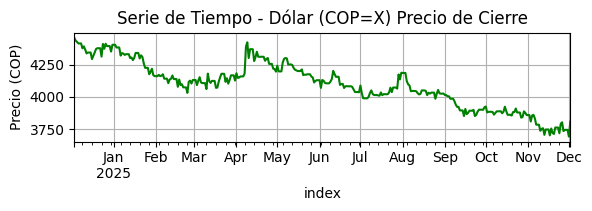

In [46]:
plt.subplot(3, 1, 1)
df_final[('COP=X', 'Close')].plot(title='Serie de Tiempo - Dólar (COP=X) Precio de Cierre', ax=plt.gca(), color='green')
plt.ylabel('Precio (COP)')
plt.grid(True)

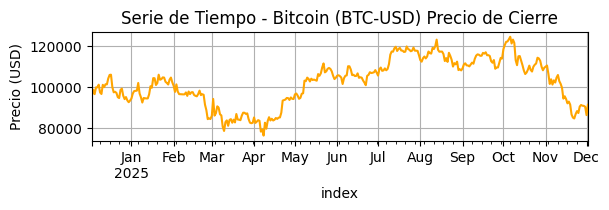

In [47]:
plt.subplot(3, 1, 2)
df_final[('BTC-USD', 'Close')].plot(title='Serie de Tiempo - Bitcoin (BTC-USD) Precio de Cierre', ax=plt.gca(), color='orange')
plt.ylabel('Precio (USD)')
plt.grid(True)

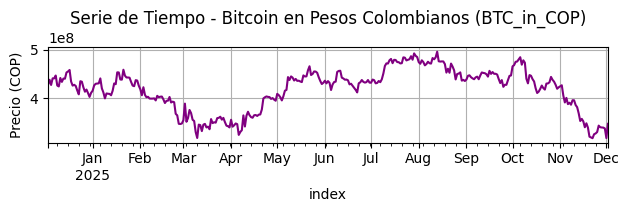

In [50]:
plt.subplot(3, 1, 3)
df_final['BTC_in_COP'].plot(title='Serie de Tiempo - Bitcoin en Pesos Colombianos (BTC_in_COP)', ax=plt.gca(), color='purple')
plt.ylabel('Precio (COP)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [51]:
print("\n2. Histogramas...")
plt.figure(figsize=(16, 10))


2. Histogramas...


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

Text(0, 0.5, 'Frecuencia')

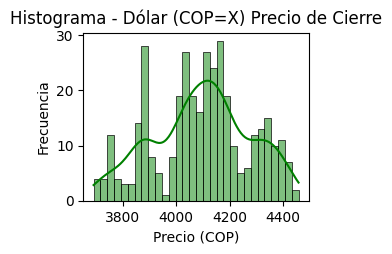

In [52]:
plt.subplot(2, 2, 1)
sns.histplot(df_final[('COP=X', 'Close')].dropna(), kde=True, bins=30, color='green')
plt.title('Histograma - Dólar (COP=X) Precio de Cierre')
plt.xlabel('Precio (COP)')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

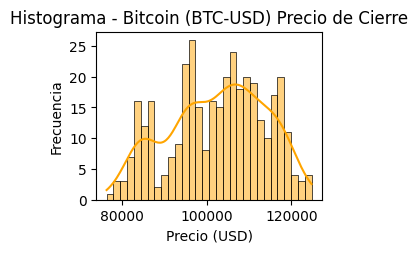

In [53]:
plt.subplot(2, 2, 2)
sns.histplot(df_final[('BTC-USD', 'Close')].dropna(), kde=True, bins=30, color='orange')
plt.title('Histograma - Bitcoin (BTC-USD) Precio de Cierre')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

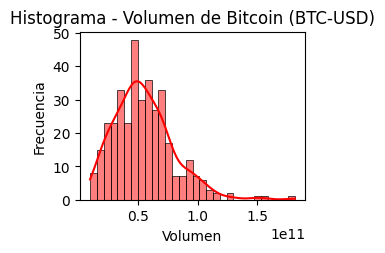

In [54]:
plt.subplot(2, 2, 3)
sns.histplot(df_final[('BTC-USD', 'Volume')].dropna(), kde=True, bins=30, color='red')
plt.title('Histograma - Volumen de Bitcoin (BTC-USD)')
plt.xlabel('Volumen')
plt.ylabel('Frecuencia')

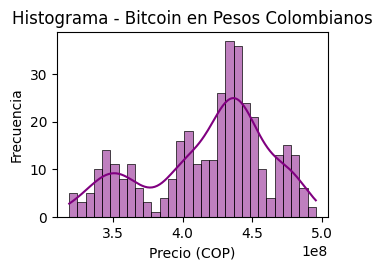

In [55]:
plt.subplot(2, 2, 4)
sns.histplot(df_final['BTC_in_COP'].dropna(), kde=True, bins=30, color='purple')
plt.title('Histograma - Bitcoin en Pesos Colombianos')
plt.xlabel('Precio (COP)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [56]:
print("\n3. Diagramas de Cajas y Bigotes...")
plt.figure(figsize=(16, 8))


3. Diagramas de Cajas y Bigotes...


<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

Text(0, 0.5, 'Precio (COP)')

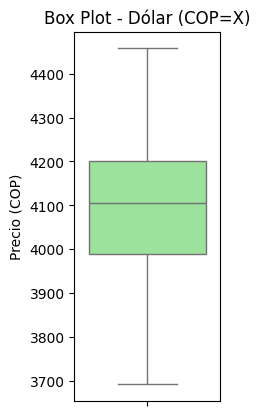

In [57]:
plt.subplot(1, 3, 1)
sns.boxplot(y=df_final[('COP=X', 'Close')].dropna(), color='lightgreen')
plt.title('Box Plot - Dólar (COP=X)')
plt.ylabel('Precio (COP)')

Text(0, 0.5, 'Precio (USD)')

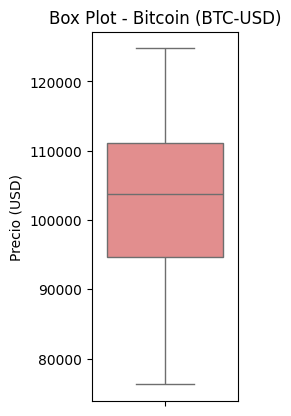

In [58]:
plt.subplot(1, 3, 2)
sns.boxplot(y=df_final[('BTC-USD', 'Close')].dropna(), color='lightcoral')
plt.title('Box Plot - Bitcoin (BTC-USD)')
plt.ylabel('Precio (USD)')

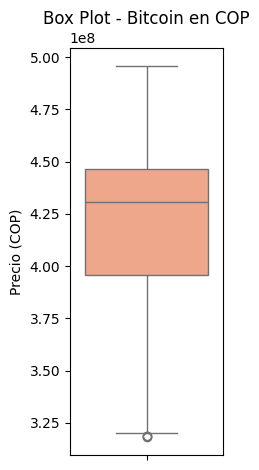

In [59]:
plt.subplot(1, 3, 3)
sns.boxplot(y=df_final['BTC_in_COP'].dropna(), color='lightsalmon')
plt.title('Box Plot - Bitcoin en COP')
plt.ylabel('Precio (COP)')

plt.tight_layout()
plt.show()


4. Diagrama Circular - Variable Categórica de Volumen de Bitcoin...


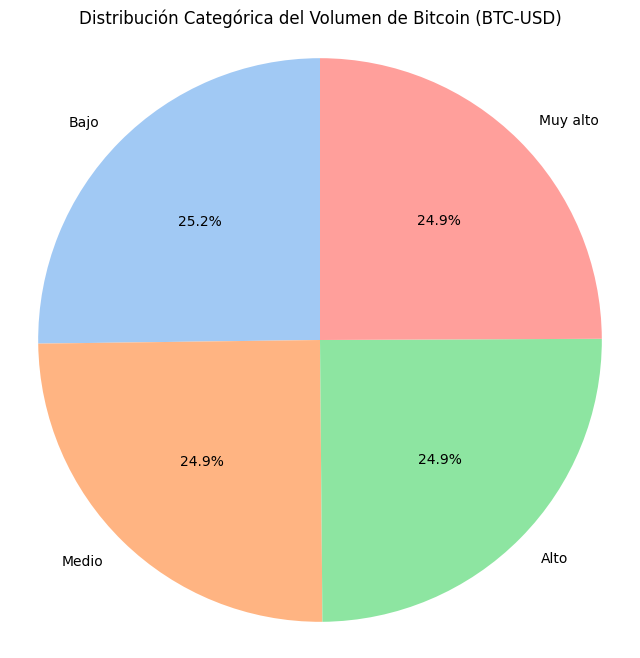


Análisis gráfico completado.


In [60]:
print("\n4. Diagrama Circular - Variable Categórica de Volumen de Bitcoin...")
plt.figure(figsize=(8, 8))
pie_data = df_final['catvolume#BTC-USD'].value_counts()
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución Categórica del Volumen de Bitcoin (BTC-USD)')
plt.axis('equal') # Asegura que el pie chart sea un círculo.
plt.show()

print("\nAnálisis gráfico completado.")

In [64]:
columnas_correlacion = [
    ('COP=X', 'Close'),
    ('BTC-USD', 'Close'),
    ('AAPL', 'Close'),
    ('^GSPC', 'Close'),
    ('GC=F', 'Close'), # Oro (Gold Futures)
    ('GOOG', 'Close'),
    ('BTC_in_COP', '') # Variable calculada
]

In [65]:
df_corr_data = df_final[columnas_correlacion].copy()

In [67]:
df_corr_data.columns = [
    'COP=X', 'BTC-USD', 'AAPL', '^GSPC', 'GC=F', 'GOOG', 'BTC_in_COP'
]

correlation_matrix = df_corr_data.corr(method='pearson')

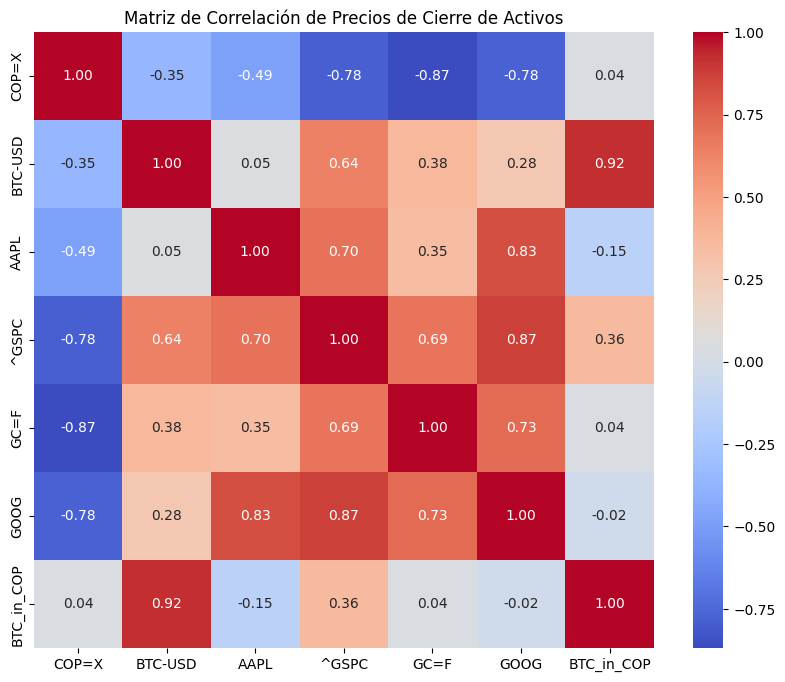

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Muestra el valor de correlación en cada celda
    fmt=".2f",         # Formato a dos decimales
    cmap='coolwarm',   # Esquema de color para distinguir correlaciones positivas/negativas
    cbar=True          # Muestra la barra de color
)
plt.title('Matriz de Correlación de Precios de Cierre de Activos')
plt.show() #

In [69]:
ventana = 20

In [70]:
df_final['MA_20'] = df_final['BTC_in_COP'].rolling(window=ventana).mean()

In [71]:
df_final['Error_Pred'] = df_final['BTC_in_COP'] - df_final['MA_20']

In [72]:
print("✅ Media Móvil (MA-20) y Error de Predicción Calculados.")
print("\nPrimeras filas con datos válidos (a partir del día 20):")
print(df_final[['BTC_in_COP', 'MA_20', 'Error_Pred']].tail())

✅ Media Móvil (MA-20) y Error de Predicción Calculados.

Primeras filas con datos válidos (a partir del día 20):
Ticker        BTC_in_COP         MA_20    Error_Pred
Price                                               
index                                               
2025-11-28  3.403908e+08  3.498185e+08 -9.427739e+06
2025-11-29  3.401381e+08  3.470117e+08 -6.873642e+06
2025-11-30  3.384254e+08  3.441270e+08 -5.701511e+06
2025-12-01  3.186869e+08  3.407391e+08 -2.205227e+07
2025-12-02  3.478981e+08  3.390377e+08  8.860379e+06


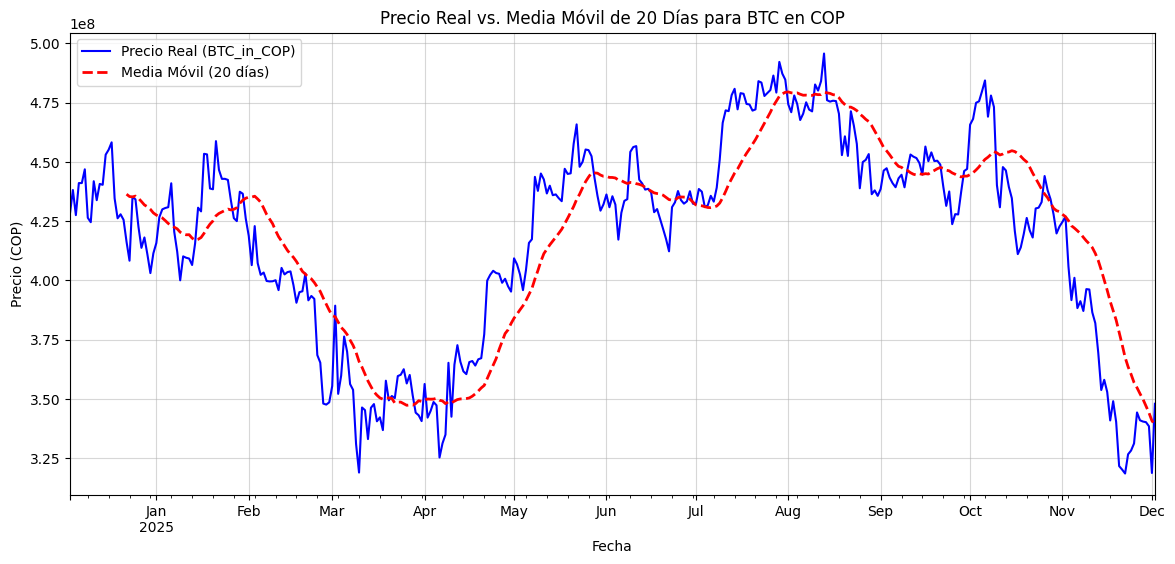

In [73]:
plt.figure(figsize=(14, 6))
df_final['BTC_in_COP'].plot(label='Precio Real (BTC_in_COP)', color='blue', linewidth=1.5)
df_final['MA_20'].plot(label=f'Media Móvil ({ventana} días)', color='red', linewidth=2.0, linestyle='--')
plt.title(f'Precio Real vs. Media Móvil de {ventana} Días para BTC en COP')
plt.xlabel('Fecha')
plt.ylabel('Precio (COP)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

In [74]:
errores = df_final['Error_Pred'].dropna()
precios_reales = df_final['BTC_in_COP'].loc[errores.index]

In [75]:
MAE = errores.abs().mean()

In [76]:
MSE = np.mean(errores ** 2)

In [77]:
RMSE = np.sqrt(MSE)

In [78]:
MAPE = np.mean(np.abs(errores / precios_reales)) * 100

print("✅ Estadísticas de Error de la Media Móvil (MA-20):")
print("-" * 50)
print(f"1. MAE (Error Absoluto Medio): {MAE:,.0f} COP")
print(f"2. RMSE (Raíz del Error Cuadrático Medio): {RMSE:,.0f} COP")
print(f"3. MAPE (Error Porcentual Absoluto Medio): {MAPE:.2f} %")
print("-" * 50)

✅ Estadísticas de Error de la Media Móvil (MA-20):
--------------------------------------------------
1. MAE (Error Absoluto Medio): 15,613,236 COP
2. RMSE (Raíz del Error Cuadrático Medio): 19,545,463 COP
3. MAPE (Error Porcentual Absoluto Medio): 3.87 %
--------------------------------------------------


In [81]:
columnas_close = [
    ('COP=X', 'Close'),
    ('BTC-USD', 'Close'),
    ('AAPL', 'Close'),
    ('^GSPC', 'Close'),
    ('GC=F', 'Close'),
    ('GOOG', 'Close'),
    ('BTC_in_COP', '')
]

In [82]:
df_scatter = df_final[columnas_close].copy()

In [83]:
df_scatter.columns = [
    'COP=X', 'BTC-USD', 'AAPL', '^GSPC', 'GC=F', 'GOOG', 'BTC_in_COP'
]

In [84]:
print("Generando la Matriz de Gráficos de Dispersión...")

Generando la Matriz de Gráficos de Dispersión...


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

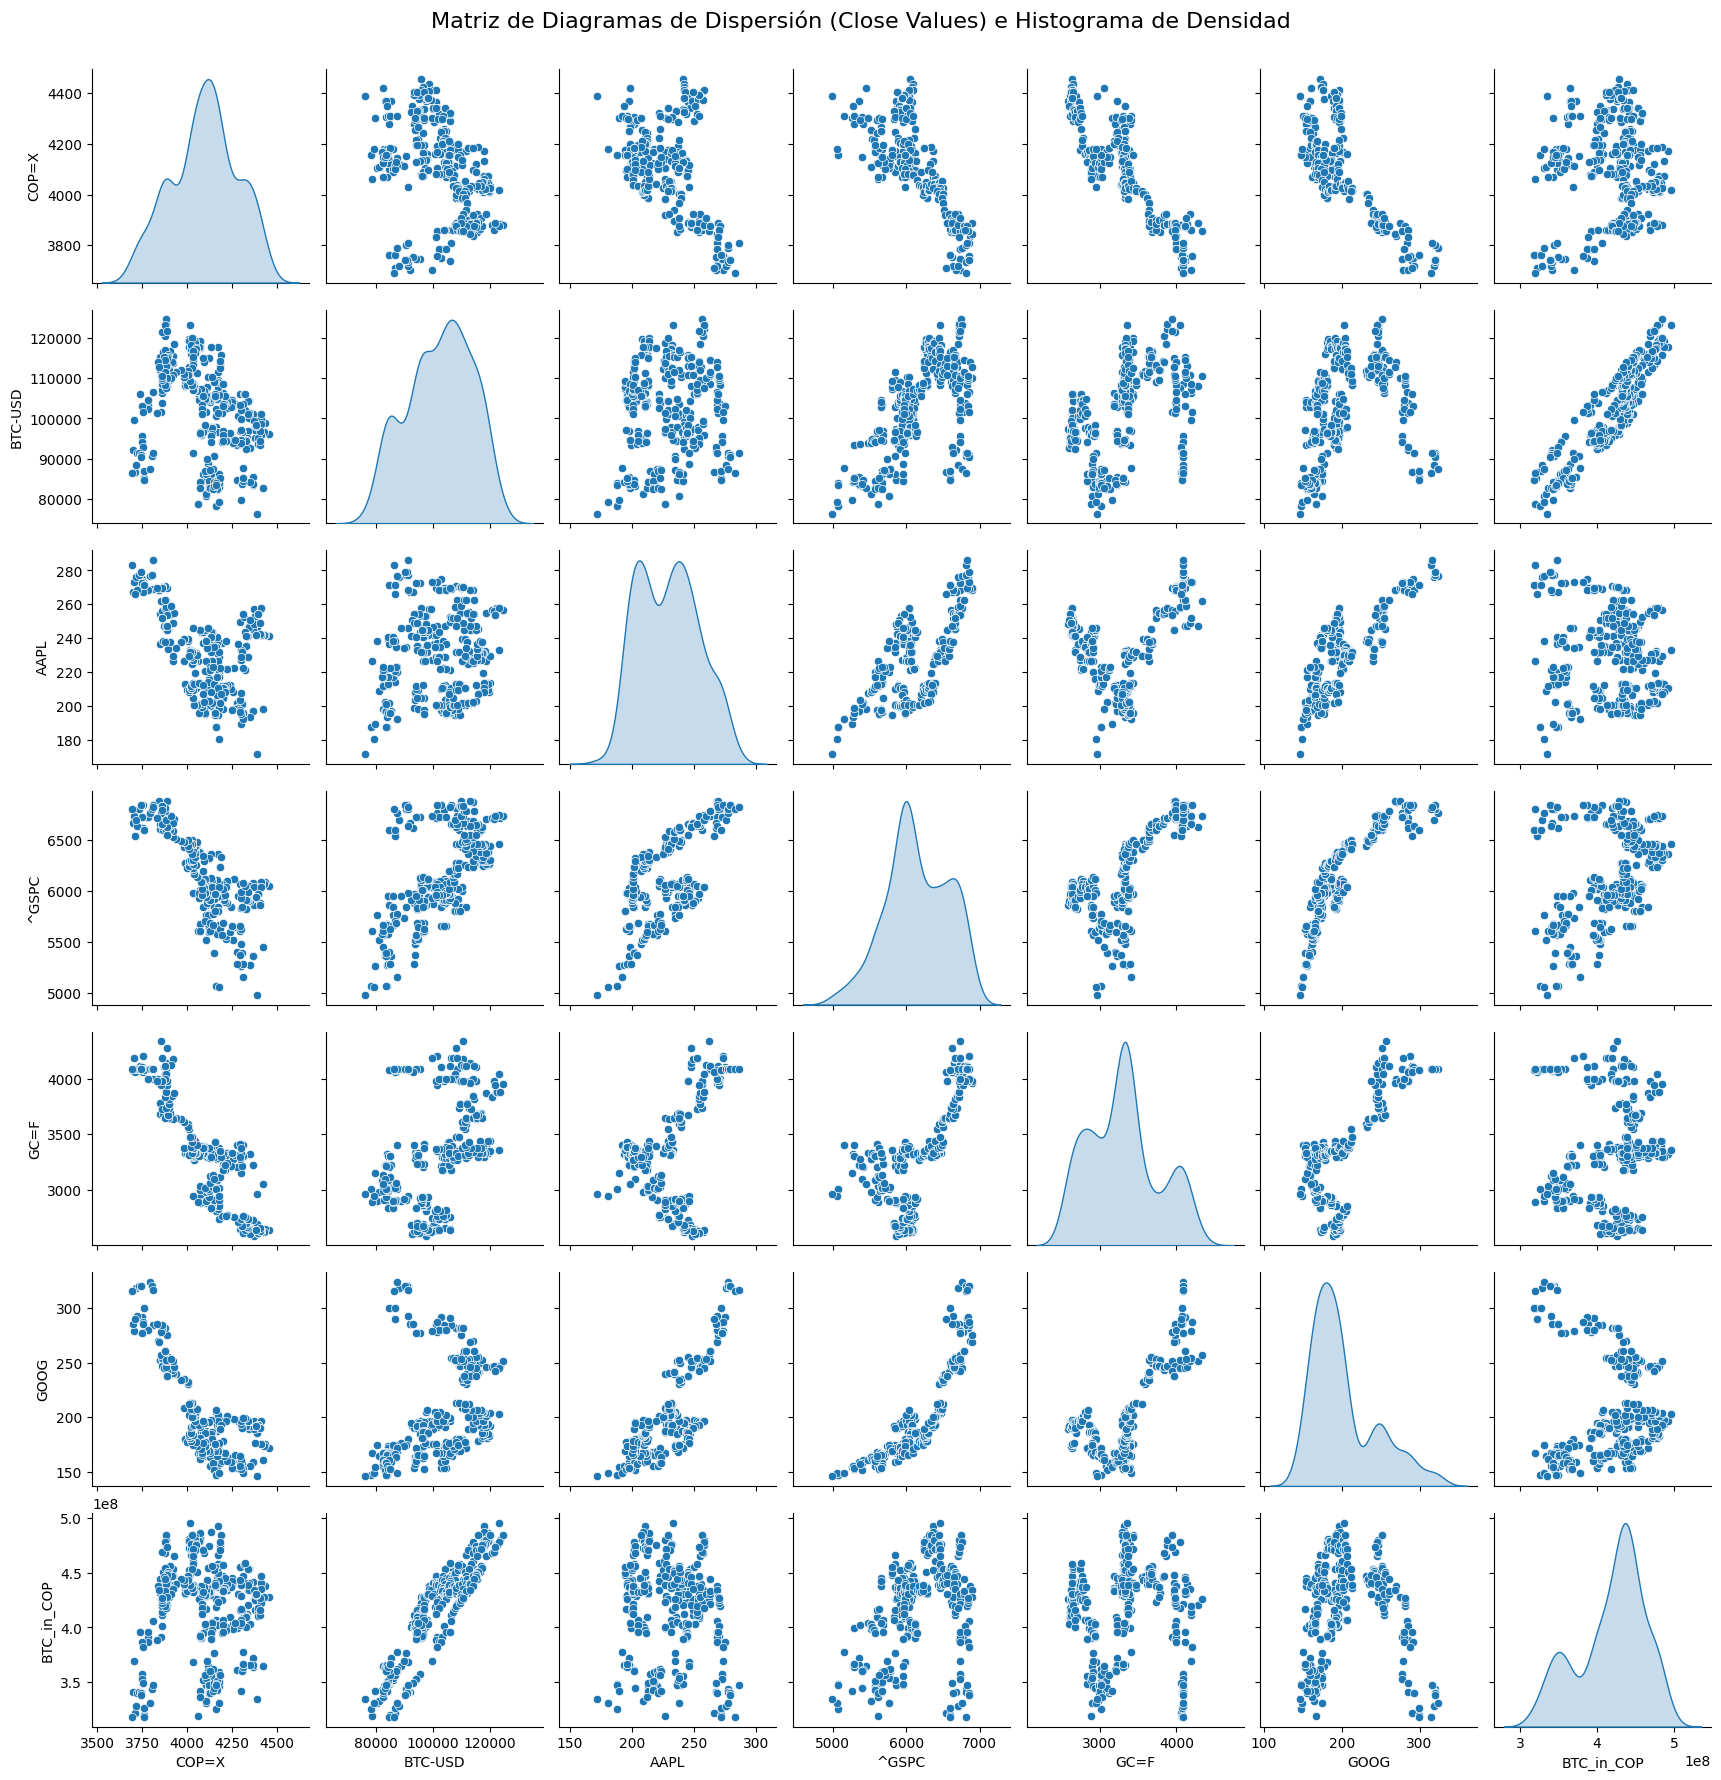

In [85]:
sns.pairplot(
    df_scatter,
    kind='scatter',
    diag_kind='kde',
    palette='viridis' # Opcional: Define la paleta de colores
)

plt.suptitle('Matriz de Diagramas de Dispersión (Close Values) e Histograma de Densidad', y=1.02, fontsize=16)
plt.show()

In [86]:
import statsmodels.api as sm
import numpy as np

In [87]:
Y = df_final['BTC_in_COP'].dropna()
X_var = ('^GSPC', 'Close')
X = df_final[X_var].dropna()

In [89]:
data_model = pd.DataFrame({'Y': Y, 'X': X}).dropna()

Y_model = data_model['Y']
X_model = data_model['X']

In [90]:
X_model = sm.add_constant(X_model)

In [91]:
modelo_ols = sm.OLS(Y_model, X_model).fit()

print("✅ Modelo de Regresión Lineal Ajustado.")

✅ Modelo de Regresión Lineal Ajustado.


In [92]:
print("\nResumen Estadístico del Modelo (BTC_in_COP vs. S&P 500):")
print(modelo_ols.summary())


Resumen Estadístico del Modelo (BTC_in_COP vs. S&P 500):
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     53.98
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           1.35e-12
Time:                        02:38:26   Log-Likelihood:                -6904.9
No. Observations:                 365   AIC:                         1.381e+04
Df Residuals:                     363   BIC:                         1.382e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------